<a href="https://colab.research.google.com/github/RyanSaul85/freeCodeCamp/blob/main/freeCodeCamp_Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Level Predictor

Analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

### Tasks

1. Use Pandas to import the data from epa-sea-level.csv.
2. Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
3. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
The x label should be Year, the y label should be Sea Level (inches), and the title.

### 1. Use Pandas to import the data from epa-sea-level.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
url = 'https://raw.githubusercontent.com/RyanSaul85/freeCodeCamp/main/epa-sea-level.csv'

df= pd.read_csv(url)
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### 2. Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

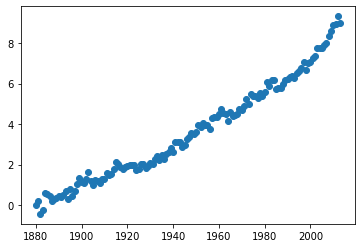

In [3]:
fig, ax = plt.subplots()
ax.scatter(x= 'Year', y = 'CSIRO Adjusted Sea Level', data = df);

### 3. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [5]:
slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
years = pd.Series(range(1880,2050))
ax.plot(years, intercept + slope*years, 'r', label='first line of best fit')

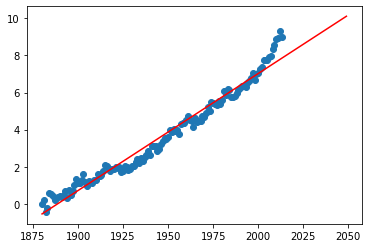

In [18]:
fig, ax = plt.subplots()
ax.plot(years, intercept + slope*years, 'r', label='first line of best fit')
ax.scatter(x= 'Year', y = 'CSIRO Adjusted Sea Level', data = df);

### 4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000. The x label should be Year, the y label should be Sea Level (inches), and the title.

In [19]:
df2 = df.loc[df["Year"] >= 2000]
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df2["Year"], df2["CSIRO Adjusted Sea Level"])
years2 = pd.Series(range(2000,2050))
ax.plot(years2, intercept2 + slope2*years2, 'b', label='second line of best fit')

In [20]:
  ax.set(xlabel="Year", ylabel="Sea Level (inches)", title="Rise in Sea Level")

[Text(3.200000000000003, 0.5, 'Sea Level (inches)'),
 Text(0.5, 3.1999999999999993, 'Year'),
 Text(0.5, 1.0, 'Rise in Sea Level')]

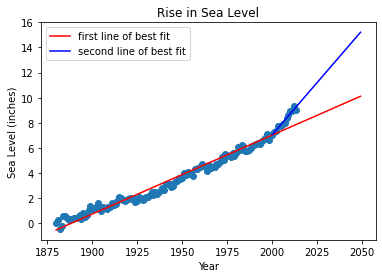

In [21]:
fig, ax = plt.subplots()
ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])
ax.plot(years, intercept + slope*years, 'r', label='first line of best fit')
ax.plot(years2, intercept2 + slope2*years2, 'b', label='second line of best fit')
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
plt.legend()
plt.show()

That is a significant difference in 2050 sea level predictions depending on if the regression line was calculated from year 2000-2050 or 1880-2050. We can look at other year ranges as well.

### Extra

In [22]:
df3 = df.loc[df["Year"] >= 1950]
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(df3["Year"], df3["CSIRO Adjusted Sea Level"])
years3 = pd.Series(range(1950,2050))
ax.plot(years3, intercept3 + slope3*years3, 'b', label='third line of best fit')

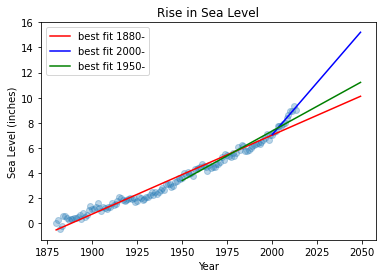

In [23]:
fig, ax = plt.subplots()
ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], alpha=0.3)
ax.plot(years, intercept + slope*years, 'r', label='best fit 1880-')
ax.plot(years2, intercept2 + slope2*years2, 'b', label='best fit 2000-')
ax.plot(years3, intercept3 + slope3*years3, 'b', label='best fit 1950-', color='green')
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
plt.legend()
plt.show()